# Lab_09
## Muhammad Haseeb Ishaq
### Reg: 2021389

In [1]:
pip install tensorflow

# Task 1

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [3]:
# Generate a noisy dataset
def generate_noisy_data(original_data, noise_factor=0.5):
    noise = np.random.normal(loc=0, scale=noise_factor, size=original_data.shape)
    noisy_data = original_data + noise
    return np.clip(noisy_data, 0., 1.)

In [4]:
# Create a simple autoencoder model
def build_denoising_autoencoder(input_shape):
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(128, activation='relu')(input_layer)
    decoded = Dense(input_shape, activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

In [5]:
# Train the denoising autoencoder
def train_autoencoder(autoencoder, x_train, x_noisy_train, epochs=10, batch_size=32):
    autoencoder.fit(x_noisy_train, x_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.2)

In [6]:
# Evaluate the denoising autoencoder
def evaluate_autoencoder(autoencoder, x_test, x_noisy_test):
    denoised_data = autoencoder.predict(x_noisy_test)

    # Display some results
    n = 5  # Number of examples to show
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original Images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Noisy Images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(x_noisy_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [7]:
noise_factor = 0.5
x_train = np.random.rand(1000, 28, 28, 1) # X_train with clean data
x_noisy_train = generate_noisy_data(x_train, noise_factor)

In [8]:
# Build and train the denoising autoencoder
input_shape = np.prod(x_train.shape[1:])
autoencoder = build_denoising_autoencoder(input_shape)
train_autoencoder(autoencoder, x_train.reshape(-1, input_shape), x_noisy_train.reshape(-1, input_shape), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 2s 24ms/step - loss: 0.6939 - val_loss: 0.6932
Epoch 2/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6930 - val_loss: 0.6932
Epoch 4/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6929 - val_loss: 0.6932
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6928 - val_loss: 0.6932
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6927 - val_loss: 0.6932
Epoch 7/10
25/25 [==============================] - 0s 14ms/step - loss: 0.6925 - val_loss: 0.6933
Epoch 8/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6923 - val_loss: 0.6933
Epoch 9/10
25/25 [==============================] - 0s 11ms/step - loss: 0.6921 - val_loss: 0.6933
Epoch 10/10
25/25 [==============================] - 0s 10ms/step - loss: 0.6920 - val_loss: 0.6933


4/4 [==============================] - 0s 5ms/step


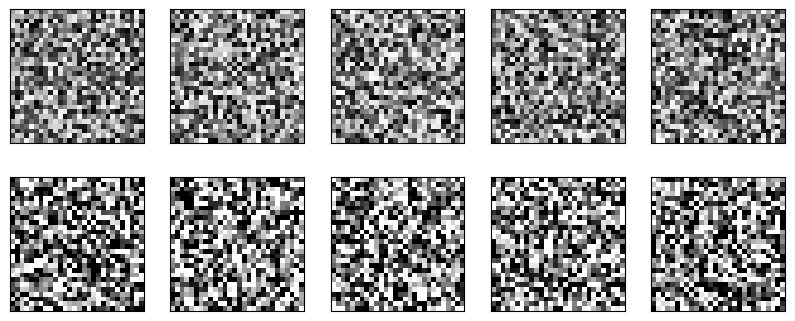

In [9]:
# Generate a test set and evaluate the autoencoder
x_test = np.random.rand(100, 28, 28, 1)
x_noisy_test = generate_noisy_data(x_test, noise_factor)

evaluate_autoencoder(autoencoder, x_test.reshape(-1, input_shape), x_noisy_test.reshape(-1, input_shape))


# Task 2

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [11]:
# Load the MNIST dataset
(x_train, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
# Flatten the images for autoencoder input
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [13]:
# Generate anomalous data (add noise to normal data)
noise_factor = 0.5
x_anomalous = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [14]:
# Build the autoencoder model
def build_autoencoder(input_shape):
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(128, activation='relu')(input_layer)
    decoded = Dense(input_shape, activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

In [15]:
# Train the autoencoder on normal data
input_shape = x_train.shape[1]
autoencoder = build_autoencoder(input_shape)
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1167 - val_loss: 0.0786
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0742 - val_loss: 0.0709
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0700 - val_loss: 0.0686
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0685 - val_loss: 0.0676
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0677 - val_loss: 0.0672
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0673 - val_loss: 0.0668
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0670 - val_loss: 0.0665
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0668 - val_loss: 0.0665
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0666 - val_loss: 0.0664
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step -

In [16]:
# Evaluate the autoencoder on both normal and anomalous data
reconstructed_normal = autoencoder.predict(x_test)
reconstructed_anomalous = autoencoder.predict(x_anomalous)

313/313 [==============================] - 1s 3ms/step


In [17]:
# Calculate reconstruction errors
mse_normal = np.mean(np.square(x_test - reconstructed_normal), axis=1)
mse_anomalous = np.mean(np.square(x_anomalous - reconstructed_anomalous), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(mse_normal) + 2 * np.std(mse_normal)

# Classify data points as normal or anomalous based on the threshold
predicted_labels = (mse_anomalous > threshold).astype(int)

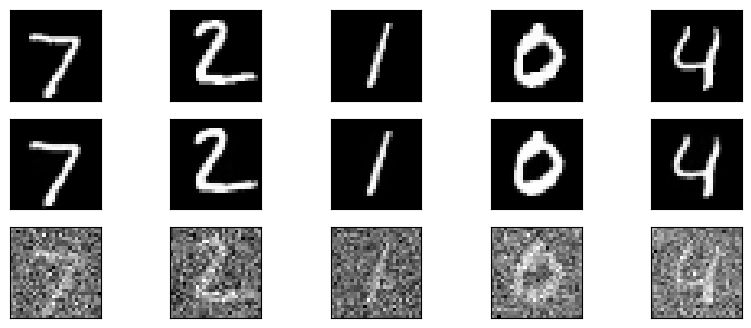

Predicted labels for anomalous data points: [1 1 1 ... 1 1 1]


In [18]:
# Visualize some examples
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Normal Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Normal Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_normal[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Anomalous Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_anomalous[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Print the predicted labels for anomalous data points
print("Predicted labels for anomalous data points:", predicted_labels)